In [1]:
import torch
from torch import nn
from hcpdiff.loss import EDMLoss, SSIMLoss, GWLoss  # Replace 'your_module_name' with the actual module name where MinSNRLoss is defined

class CombinedLoss(nn.Module):
    def __init__(self, edm_weight=1.0, ssim_weight=0.1, gw_weight=0.1, gamma=1.0,**kwargs):
        super(CombinedLoss, self).__init__()

        self.edm_loss = EDMLoss(gamma=gamma, **kwargs)
        
        self.ssim_loss = SSIMLoss( **kwargs)
        self.gw_loss = GWLoss(**kwargs)

        self.edm_weight = edm_weight
        self.ssim_weight = ssim_weight
        self.gw_weight = gw_weight

    def forward(self, input: torch.Tensor, target: torch.Tensor, sigma: torch.Tensor) -> torch.Tensor: # input: latent target: latent sigma [b,64,64,64]
        edm_loss = self.edm_loss(input, target, sigma)
        ssim_loss = self.ssim_loss(input, target)
        gw_loss = self.gw_loss(input, target)

        # Combine losses with weights
        combined_loss = (
            self.edm_weight * edm_loss +  # [20, 64, 64, 64]
            self.ssim_weight * ssim_loss + 
            self.gw_weight * gw_loss
        )

        return combined_loss

import torch

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
edm_loss = EDMLoss(gamma=0.5)

ssim_loss = SSIMLoss( channel=64)
gw_loss = GWLoss(reduction=None)
# 加载保存的 input、target 和 sigma
inputs = torch.load('/home/linjw/Innoverse/HCP-Diffusion/test/input_tensor.pt').cpu()
target = torch.load('/home/linjw/Innoverse/HCP-Diffusion/test/target_tensor.pt').cpu()
sigma = torch.load('/home/linjw/Innoverse/HCP-Diffusion/test/sigma_tensor.pt').cpu()


edm_loss = edm_loss(inputs, target, sigma)
ssim_loss = ssim_loss(inputs, target)
gw_loss = gw_loss(inputs, target)


In [3]:
ssim_loss

tensor([0.9971, 0.9969, 0.6088, 0.9254, 0.9265, 0.9910, 0.9662, 0.1626, 0.9952,
        0.5935, 0.5089, 0.5725, 0.9575, 0.9895, 0.9160, 0.9956, 0.9941, 0.1782,
        0.9933, 0.9477, 0.8617, 0.9748, 0.8918, 0.9255, 0.1142, 0.9114, 0.5385,
        0.6523, 0.4131, 0.5837, 0.8018, 0.9939, 0.9810, 0.9196, 0.9926, 0.9986,
        0.6438, 0.9965, 0.7840, 0.9971, 0.9043, 0.9736, 0.9478, 0.1361, 0.1652,
        0.2760, 0.9737, 0.9361, 0.7770, 0.9827, 0.5987, 0.8147, 0.9888, 0.9451,
        0.9844, 0.9890, 0.9964, 0.2553, 0.2436, 0.7126, 0.6813, 0.9829, 0.8994,
        0.5015, 0.3429, 0.9229, 0.9910, 0.6610, 0.8932, 0.4058, 0.9809, 0.9639,
        0.2709, 0.6742, 0.2757, 0.9276, 0.5540, 0.9203, 0.4641, 0.9856],
       grad_fn=<RsubBackward1>)

In [4]:
edm_loss

tensor([[[[1.5289e+03, 5.8285e+01, 1.2768e+03,  ..., 6.2508e+02,
           1.2532e+02, 7.7074e+01],
          [9.2762e+01, 4.7595e+01, 2.2890e+02,  ..., 3.9060e+02,
           3.2351e+02, 1.5219e+01],
          [1.7793e+02, 1.3018e+03, 1.0070e+02,  ..., 1.5151e+02,
           3.8573e+01, 1.6573e+03],
          ...,
          [3.8610e+02, 6.9421e+01, 2.1551e+02,  ..., 1.3206e+02,
           1.2188e+01, 4.0551e+01],
          [1.2746e-01, 1.0553e+00, 3.2857e+02,  ..., 8.7959e+01,
           5.4404e+01, 1.0307e+03],
          [1.6644e+03, 1.7937e+02, 8.5899e+02,  ..., 1.8719e+03,
           2.7865e+03, 1.0462e+03]],

         [[6.1653e+00, 6.7716e+01, 5.7415e+02,  ..., 1.9720e+02,
           8.1308e+02, 1.0262e+01],
          [1.5525e+02, 6.8846e+02, 5.7897e+00,  ..., 8.8264e+01,
           1.7044e+02, 4.3882e+02],
          [3.3043e+01, 4.3776e+02, 1.9294e+00,  ..., 2.0193e+02,
           7.0951e+02, 1.2292e+03],
          ...,
          [9.3662e+01, 3.1114e+01, 4.6408e+02,  ..., 3.1535

In [5]:
gw_loss.mean()

tensor(9596.6367, grad_fn=<MeanBackward0>)

In [23]:
edm_loss.mean()

tensor(57.2899, grad_fn=<MeanBackward0>)

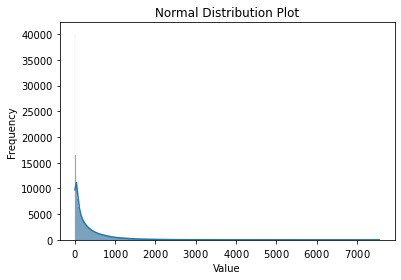

In [17]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# 生成形状为 (64, 64, 64) 的随机张量
tensor = edm_loss[1].detach()

# 将张量展平以绘制直方图
flat_tensor = tensor.view(-1).numpy()

# 使用 seaborn 绘制直方图
sns.histplot(flat_tensor, kde=True)

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Plot')
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# 显示图形
plt.show()


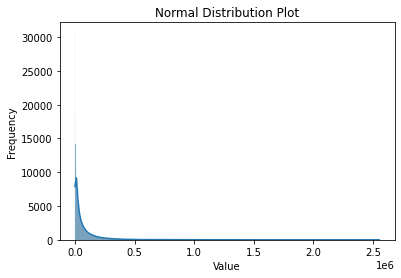

In [19]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
# 生成形状为 (64, 64, 64) 的随机张量
tensor = gw_loss[1].detach()

# 将张量展平以绘制直方图
flat_tensor = tensor.view(-1).numpy()

# 使用 seaborn 绘制直方图
sns.histplot(flat_tensor, kde=True)

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Plot')


# 显示图形
plt.show()


In [21]:
7000/(2.5*1e6)

0.0028

In [22]:
1000/(0.3*1e6
      )

0.0033333333333333335